# <h2>Task-1</h2>
<h3>Aim</h3>
<p>To build a model that predicts whether a
passenger on the Titanic survived or not.</p>
<h3>Dataset used</h3>
<p>Titanic Dataset - This dataset contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin and whether they survived or not.</p>
<br>
<p>We will be using Random Forest Classifier to handle the mixed data types and missing values efficiently. It also provides insights into feature importance, captures complex relationships within the data and maintains strong predictive performance without overfitting. Hence this makes it a suitable choice for our analysis.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [22]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Titanic-Dataset.csv")

In [38]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


In [39]:
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   1

In [24]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
# Data Cleaning
# Fill missing 'Age' values with the median age
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill missing 'Embarked' values with the most common embarkation port
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column due to a large number of missing values
df.drop(columns=['Cabin'], inplace=True)

# Check for missing values again to ensure there are none left
print(df.isnull().sum())

# Convert categorical columns to numeric
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


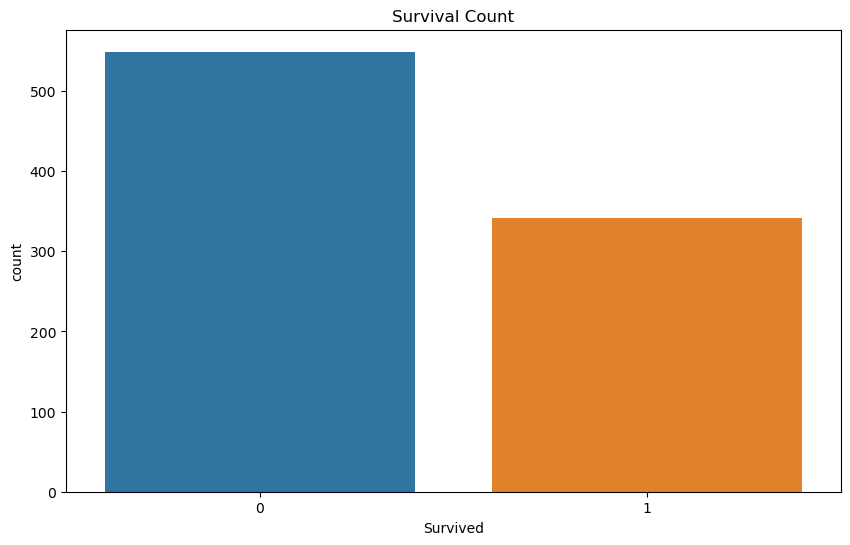

In [26]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

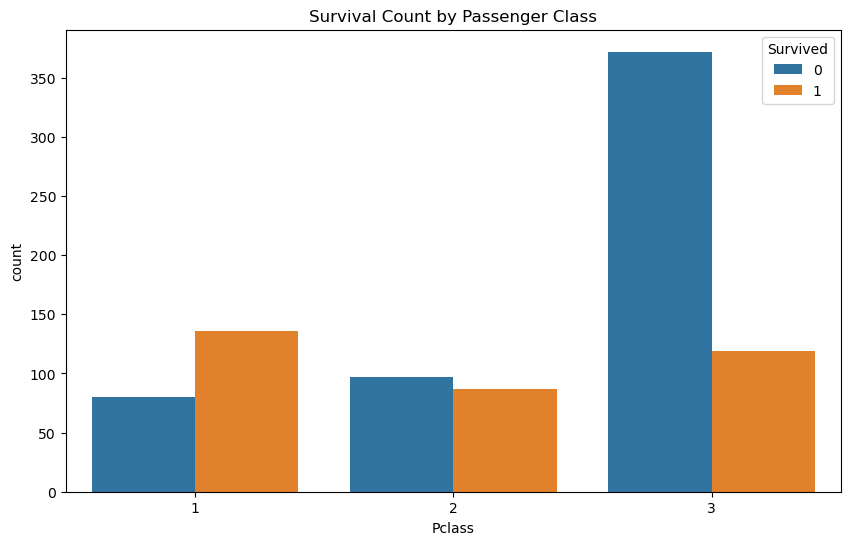

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

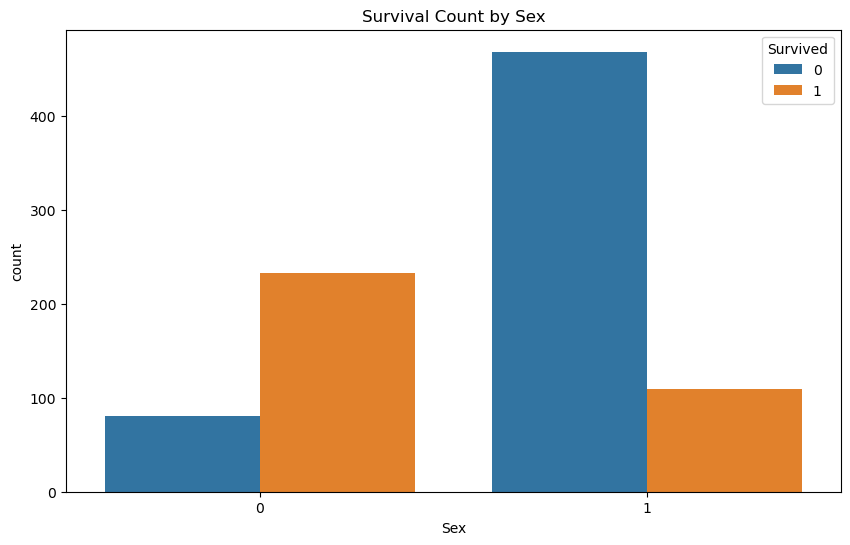

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

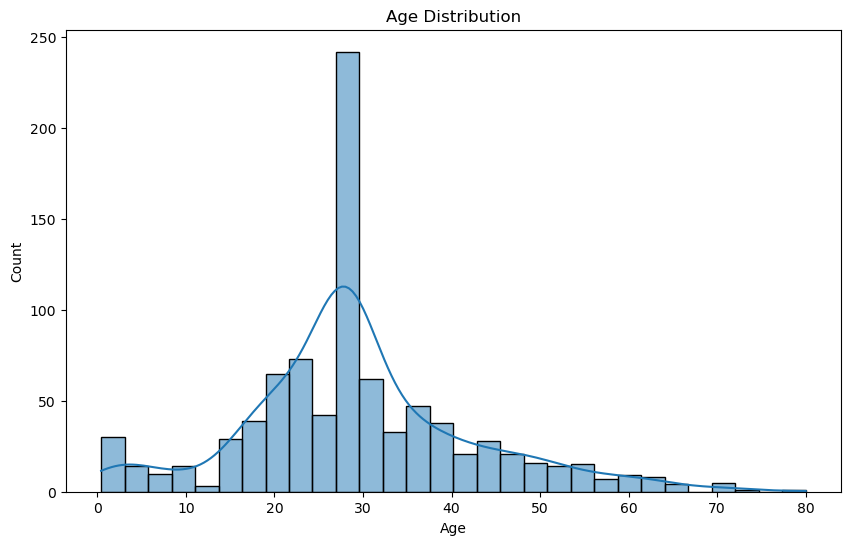

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

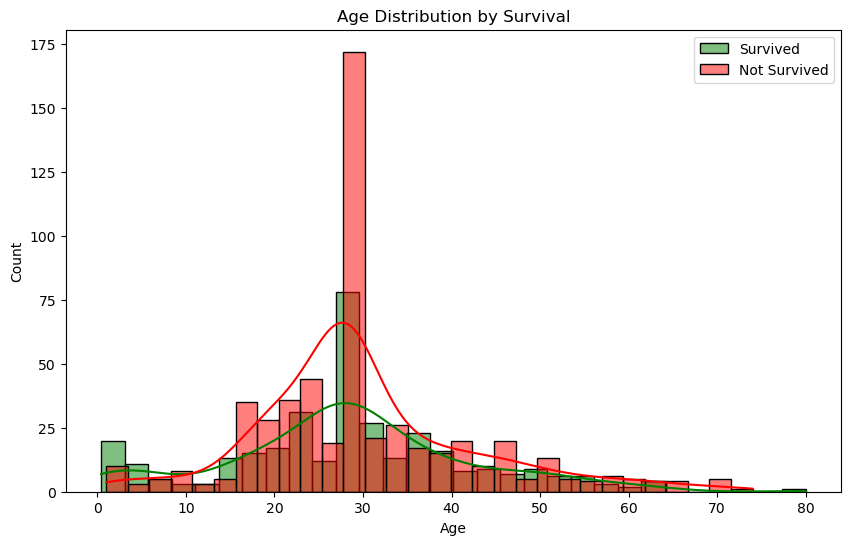

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

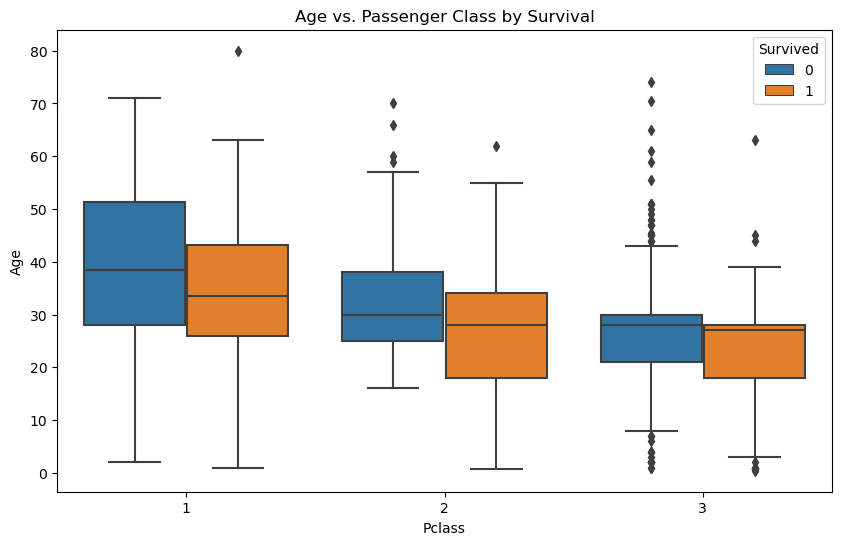

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age vs. Passenger Class by Survival')
plt.show()

In [32]:
# Feature Selection and Scaling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Building and evaluating model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.82
Confusion Matrix:
[[92 13]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



<Figure size 1000x600 with 0 Axes>

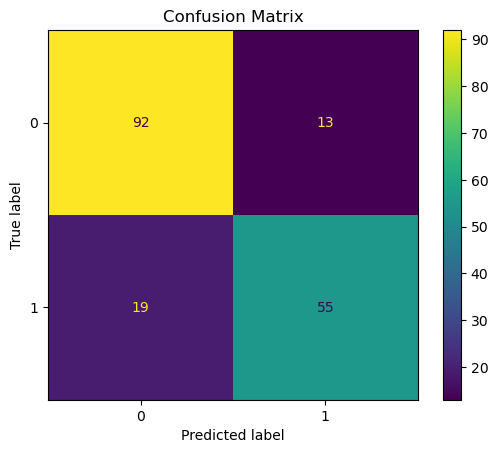

In [34]:
# confusion matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

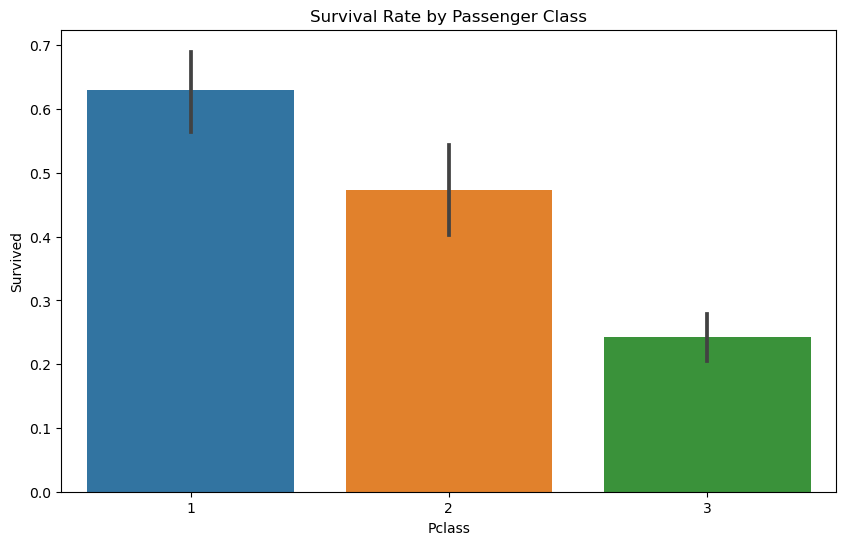

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

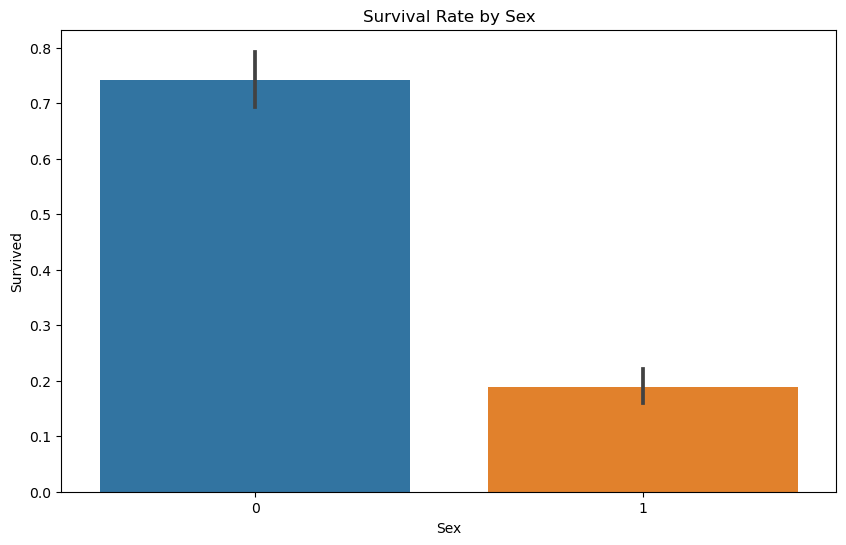

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

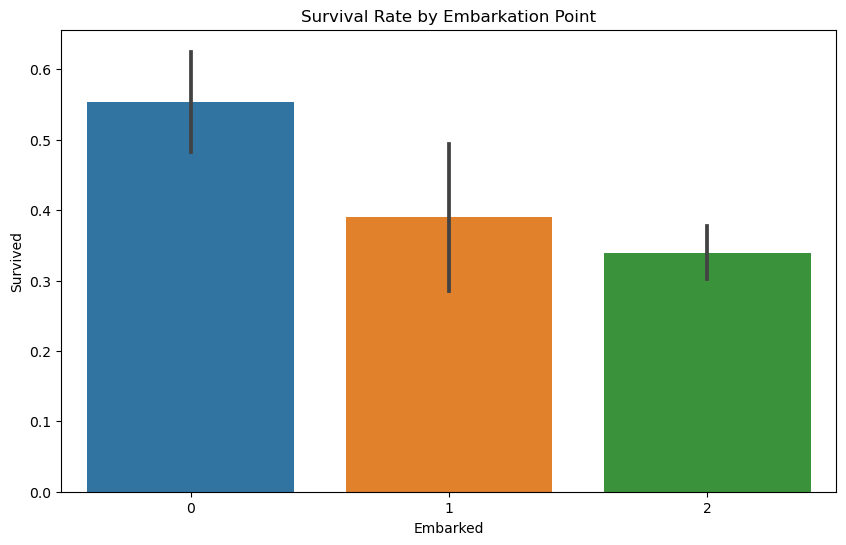

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.show()

# <h3>Inference</h3>
<p>The RandomForestClassifier model achieved an accuracy of 82% on the test dataset, indicating strong predictive performance. This confusion matrix reveals that the model correctly classified 92 out of 105 non-survivors and 55 out of 74 survivors. The classification report shows that the model's precision is 0.83 for non-survivors and 0.81 for survivors, while the recall is 0.88 for non-survivors and 0.74 for survivors. Overall, the model demonstrates a balanced ability to predict survival, with robust precision, recall, and F1-scores across both classes.</p>